In [1]:
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
from shapely.geometry import shape, Polygon
import itertools

In [10]:
# Read in Shapefile
ugc_county = geopandas.read_file('../c_10nv20/c_10nv20.shp')


#cat_gdf.loc[(cat_gdf['STATE']=='FL') & (cat_gdf['FIPS']=='12027')]['LON'].tolist()

#cat_gdf.loc[(cat_gdf['FIPS'] == '12027')]['geometry']

In [11]:
number = 132343455
number % 1000

455

In [13]:
counties = ["ALC031",
            "ALC045",
            "ALC061",
            "ALC067",
            "ALC069",
            "FLC059",
            "FLC063",
            "FLC131",
            "FLC133",
            "GAC007",
            "GAC017",
            "GAC019",
            "GAC027",
            "GAC037",
            "GAC061",
            "GAC071",
            "GAC075",
            "GAC087",
            "GAC095",
            "GAC099",
            "GAC131",
            "GAC155",
            "GAC173",
            "GAC177",
            "GAC185",
            "GAC201",
            "GAC205",
            "GAC239",
            "GAC243",
            "GAC253",
            "GAC273",
            "GAC275",
            "GAC277",
            "GAC287",
            "GAC321"]
counties_ugc = [int(county[-3:]) for county in counties]
state = counties[0][0:2]

In [14]:
def ugc_county_geography(ugcs):
    '''Returns latitudes and longitudes from UGC county-based alerts'''
    counties = [int(ugc[-3:]) for ugc in ugcs]
    state = ugcs[0][0:2]

    latitudes = []
    longitudes = []
    geometries = []
    
    for ugc in counties:
        latitude = ugc_county.loc[(ugc_county['STATE'] == state) & (ugc_county['FIPS'].astype(int) % 1000 == ugc)]['LAT'].tolist()
        longitude = ugc_county.loc[(ugc_county['STATE'] == state) & (ugc_county['FIPS'].astype(int) % 1000 == ugc)]['LON'].tolist()
        geometry = ugc_county.loc[(ugc_county['STATE'] == state) & (ugc_county['FIPS'].astype(int) % 1000 == ugc)]['geometry']
        latitudes.append(latitude)
        longitudes.append(longitude)
        geometries.append(geometry)
        
    flatten = itertools.chain.from_iterable
    latitudes = list(flatten(latitudes))
    longitudes = list(flatten(longitudes))

    return latitudes, longitudes, geometries

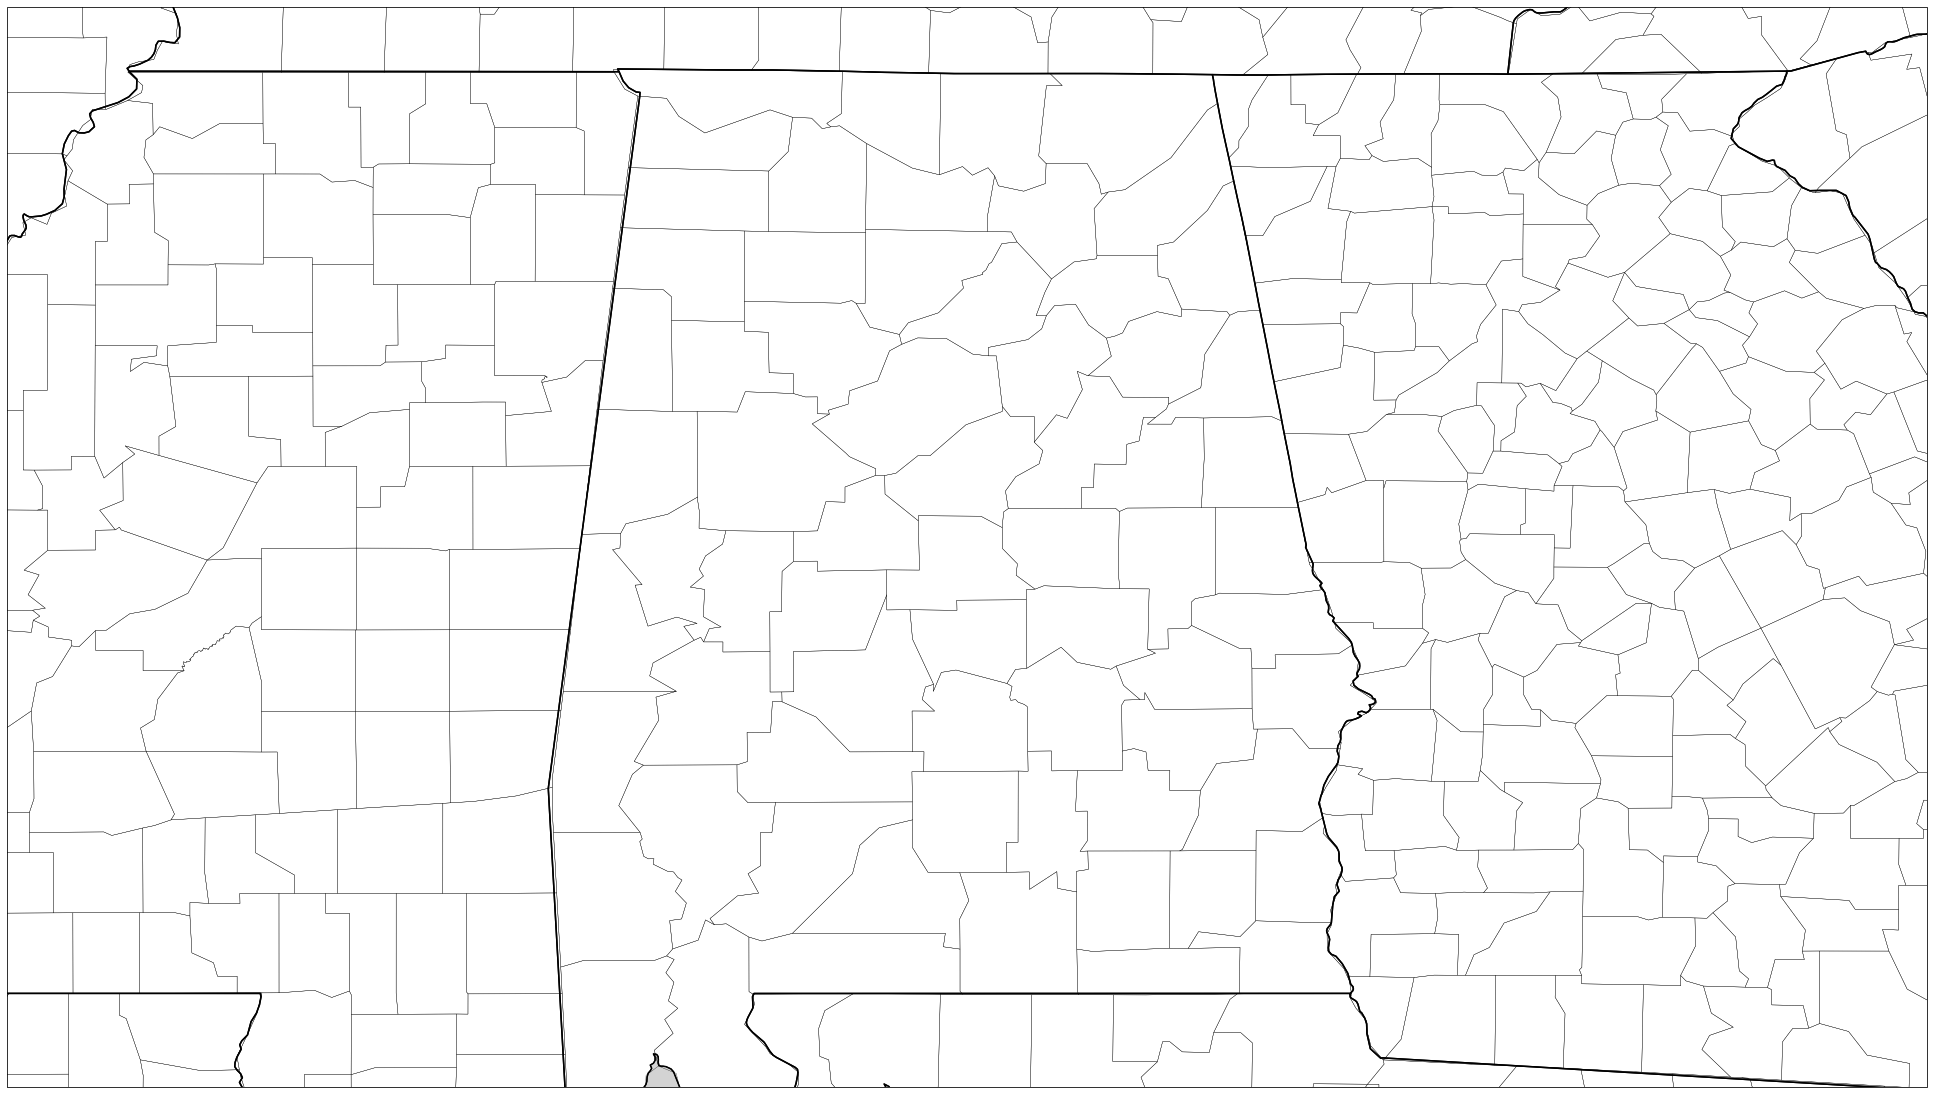

In [20]:
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

latitudes, longitudes, geometries = ugc_county_geography(counties)
west_bound = min(longitudes)
south_bound = min(latitudes)
east_bound = max(longitudes)
north_bound = max(latitudes)
polygon =  geometries

ax.set_extent([west_bound - 0.5, east_bound + 0.5, 
               south_bound - 0.5, north_bound + 0.5], 
              ccrs.PlateCarree())
ax.set_adjustable('datalim')

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.3)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.5, zorder=10)

# Plot alerts on the map
    for key in warning_cmap.keys():
        if key == alert['properties']['event'] and alert['geometry']:
            ax.add_geometries(alert_map_info['polygon'], crs=data_crs, facecolor=warning_cmap[key],
                              edgecolor='black', linewidth=4, zorder=6, alpha=0.04)
        elif key == alert['properties']['event'] and not alert['geometry']:
            for polys in alert_map_info['polygon']:
                ax.add_geometries(polys, crs=data_crs, facecolor=warning_cmap[key], edgecolor='black',
                                  linewidth=4,  alpha=0.5, zorder=6)
        else:
            continue

# for ugc in counties:
#     ax.add_geometries(ugc_county[ugc_county['STATE_ZONE'] == ugc]['geometry'], crs=ccrs.PlateCarree(), 
#                       facecolor='blue', 
#                       edgecolor='black', alpha=0.5)
    
plt.savefig('new.png')